# Goals

### 1. Visualize deep learning network


### 2. Understand how the final layer would change when number of classes in dataset changes

# What do you do with a deep learning model in transfer learning

    - These are the steps already done by contributors in pytorch, keras and mxnet
        - You take a deep learning architecture, such as resnet, densenet, or even custom network
        - Train the architecture on large datasets such as imagenet, coco, etc
        - The trained wieghts become your starting point for transfer learning
    
    
    - The final layer of this pretrained model has number of neurons = number of classes in the large dataset
    
    
    - In transfer learning
        - You take the network and load the pretrained weights on the network
        - Then remove the final layer that has the extra(or less) number of neurons
        - You add a new layer with number of neurons = number of classes in your custom dataset
        - Optionally you can add more layers in between this newly added final layer and the old network
    
    
    - Now you have two parts in your network
        - One that already existed, the pretrained one, the base network
        - The new sub-network or a single layer you added
        
    
    - The hyper-parameter we can see here: Freeze base network
        - Freezing base network makes the base network untrainable
        - The base network now acts as a feature extractor and only the next half is trained
        - If you do not freeze the base network the entire network is trained
        (You will take this part in next sessions)
     
     

# Table of Contents


## [0. Install](#0)


## [1. Setup Default Params with Cats-Dogs dataset](#1)


## [2. Visualize network](#2)


## [3. Reset Default Params with new dataset - Logo classification](#3)


## [4. Visualize the new network](#4)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [1]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 1971 (delta 25), reused 45 (delta 15), pack-reused 1905
Receiving objects: 100% (1971/1971), 71.91 MiB | 1.33 MiB/s, done.
Resolving deltas: 100% (1045/1045), done.


In [ ]:
# Select the requirements file as per OS and CUDA version
!cd monk_v1/installation && pip install -r requirements_cu9.txt

## Dataset - Sample 
    - one having 2 classes
    - other having 16 classes

In [2]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jE-ckk0JbrdbJvIBaKMJWkTfbRDR2MaF' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1jE-ckk0JbrdbJvIBaKMJWkTfbRDR2MaF" -O study_classes.zip && rm -rf /tmp/cookies.txt

--2020-03-01 07:53:58--  https://docs.google.com/uc?export=download&id=1jE-ckk0JbrdbJvIBaKMJWkTfbRDR2MaF
Resolving docs.google.com (docs.google.com)... 2404:6800:4009:807::200e, 216.58.196.78
Connecting to docs.google.com (docs.google.com)|2404:6800:4009:807::200e|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-5s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vs1863kmhk73n3udueccubj0tl4omtac/1583029425000/18248774249360673145/*/1jE-ckk0JbrdbJvIBaKMJWkTfbRDR2MaF?e=download [following]
--2020-03-01 07:54:01--  https://doc-10-5s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vs1863kmhk73n3udueccubj0tl4omtac/1583029425000/18248774249360673145/*/1jE-ckk0JbrdbJvIBaKMJWkTfbRDR2MaF?e=download
Resolving doc-10-5s-docs.googleusercontent.com (doc-10-5s-docs.googleusercontent.com)... 2404:6800:4009:80f::2001, 216.58.203.33
Connecting to doc-10-5s-docs.googleusercontent.com (doc-10-5s-do

In [3]:
! unzip -qq study_classes.zip

# Imports

In [1]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [2]:
#Using keras backend 
from keras_prototype import prototype

### Creating and managing experiments
        - Provide project name
        - Provide experiment name

In [3]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "study-num-classes");

Keras Version: 2.2.5
Tensorflow Version: 1.12.0

Experiment Details
    Project: Project
    Experiment: study-num-classes
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/quick_prototyping/2_trasfer_learning_base/appendix_notebooks/workspace/Project/study-num-classes/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Project
                        |
                        |-----study-num-classes
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)

<a id='1'></a>
# Setup Default Params with Cats-Dogs dataset

In [4]:
gtf.Default(dataset_path="study_classes/dogs_vs_cats", 
            model_name="resnet50", 
            num_epochs=5);

Dataset Details
    Train path:     study_classes/dogs_vs_cats
    Val path:       None
    CSV train path: None
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Found 36 images belonging to 2 classes.
Found 14 images belonging to 2 classes.
Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num train images: 36
    Num val images:   14
    Num classes:      2

Model Params
    Model name:           resnet50
    Use Gpu:              True
    Gpu Memory Fraction:  0.6
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet50
        Num layers in 

### From Data summary  - Num classes:      2

<a id='2'></a>
# Visualize network

In [5]:
gtf.Visualize_With_Netron(data_shape=(3, 224, 224), port=8081);

Using Netron To Visualize
Not compatible on kaggle
Compatible only for Jupyter Notebooks
Serving 'final.h5' at http://localhost:8081


## The final layer

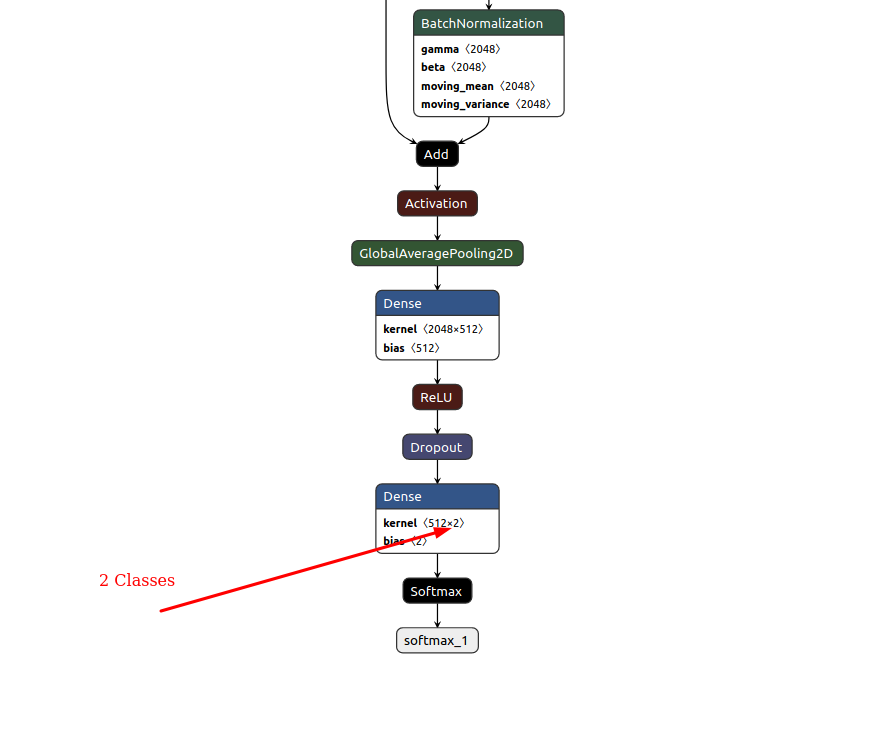

In [6]:
from IPython.display import Image
Image(filename='imgs/2_classes_base_keras.png')

<a id='3'></a>
# Reset Default Params with new dataset - Logo classification

In [7]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "study-num-classes");

Keras Version: 2.2.5
Tensorflow Version: 1.12.0

Experiment Details
    Project: Project
    Experiment: study-num-classes
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/quick_prototyping/2_trasfer_learning_base/appendix_notebooks/workspace/Project/study-num-classes/



In [8]:
gtf.Default(dataset_path="study_classes/logos", 
            model_name="resnet50", 
            num_epochs=5);

Dataset Details
    Train path:     study_classes/logos
    Val path:       None
    CSV train path: None
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Found 82 images belonging to 16 classes.
Found 28 images belonging to 16 classes.
Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num train images: 82
    Num val images:   28
    Num classes:      16

Model Params
    Model name:           resnet50
    Use Gpu:              True
    Gpu Memory Fraction:  0.6
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet50
        Num layers in mode

### From Data summary  - Num classes:      16

<a id='4'></a>
# Visualize network

In [9]:
gtf.Visualize_With_Netron(data_shape=(3, 224, 224), port=8082);

Using Netron To Visualize
Not compatible on kaggle
Compatible only for Jupyter Notebooks
Serving 'final.h5' at http://localhost:8082


## The final layer

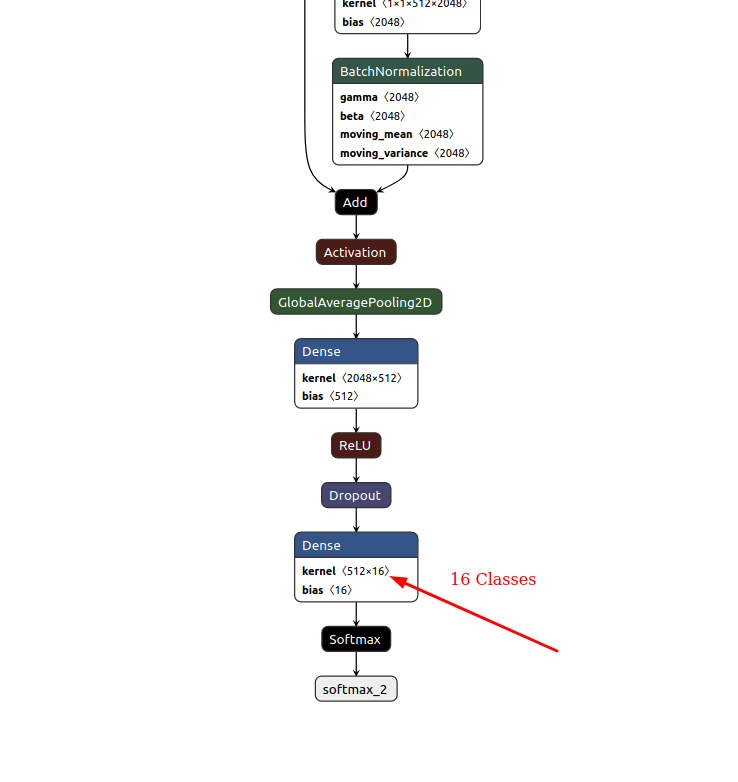

In [10]:
from IPython.display import Image
Image(filename='imgs/16_classes_base_keras.png')